In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import gensim.downloader as api
from project_data_preparation import project_data_preparation

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#nltk.download('stopwords')

In [3]:
#spacy.cli.download("en_core_web_sm")

In [4]:
wv = api.load('word2vec-google-news-300')

загрузим часть данных

In [5]:
df = pd.read_csv('data.csv', low_memory=False, skiprows=range(1, 5_000_000),nrows = 100_000)
df = df[['_id', 'text']]

обработаем созданной функцией

In [6]:
%%time
df['vector'] = df['text'].apply(lambda x: project_data_preparation(x, wv))

CPU times: total: 7min 17s
Wall time: 7min 18s


In [8]:
df

,_id,text,vector
0,5e8d90649fced0a24b5e244d,Fabrication of Dynamic Holograms on Polymer Su...,"[0.10227050632238388, 0.15795287489891052, 0.0..."
1,5e8d90649fced0a24b5e2476,Wavefront Control of 2D Curved Coding Metasurf...,"[-0.0350748710334301, -0.0474446602165699, 0.0..."
2,5e8d90649fced0a24b5e24dd,The Study on Internal Flow Characteristics of ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,5e8d90649fced0a24b5e250e,SoK of Used Cryptography in Blockchain. The un...,"[0.1048177108168602, -0.1150716170668602, 0.08..."
4,5e8d90649fced0a24b5e24cd,Iterative Multiuser Detection and Decoding for...,"[-0.00788225419819355, -0.1015101820230484, -0..."
...,...,...,...
99995,5f01a52c9fced0a24b5c726e,Jeremy Miller on Waterfall Versus Agile. Jerem...,"[0.067626953125, -0.076171875, -0.158325195312..."
99996,5f01a52c9fced0a24b5c726d,The Impact of Software on Eyecare in India. In...,"[-0.234375, -0.07177734375, 0.01055908203125, ..."
99997,5f01a52c9fced0a24b5c726a,"Conference Highlights: JIT Fault Prevention, M...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
99998,5f01a52c9fced0a24b5c726b,Expert Perspectives on AI. IEEE Software: With...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# 25 кластеров

In [15]:
%%time
num_class = 25
cur_model = KMeans(n_clusters=num_class, random_state=42).fit(pd.DataFrame(df['vector'].tolist()))

CPU times: total: 5min 36s
Wall time: 28.6 s


In [16]:
df['label'] = cur_model.labels_

In [20]:
for i in range(num_class):
    print ('%\nClaster_'+str(i)+f": {np.unique(cur_model.labels_, return_counts=True)[1][i]}")
    print(wv.similar_by_vector(cur_model.cluster_centers_[i], topn=10))
    for t in range(3):
        print(df[df['label'] == i]['text'].iloc[t])

%
Claster_0: 48954
[('duo', 0.8426488041877747), ('trio', 0.6771649122238159), ('duos', 0.5369497537612915), ('twosome', 0.5248855948448181), ('quartet', 0.5241059064865112), ('dynamic_duo', 0.5202118158340454), ('snr', 0.509723424911499), ('youngster', 0.4974743127822876), ('wife_Barbara_Feltus', 0.49114203453063965), ('Tearful_farewell', 0.48712167143821716)]
The Study on Internal Flow Characteristics of Magnetic Drive Pump. 
Improvement of the Prediction-Based Energy Efficient Ethernet Strategy. 
On Fault-Tolerant Control Systems: A Novel Reconfigurable and Adaptive Solution for Industrial Machines. 
%
Claster_1: 2045
[('network', 0.80112224817276), ('Impoverished_NKorea_gets', 0.7179200649261475), ('networks', 0.701769232749939), ('Fiber_optics_apply', 0.6999025344848633), ('MPLS_Multiprotocol_Label_Switching', 0.6969321966171265), ('Umbilical_connectors_provide', 0.677280068397522), ('systems_OSSs', 0.6763095855712891), ('DTV_PCTV_DVR', 0.6753292083740234), ('1Gbit/sec', 0.6746484

[('datum', 0.8184084892272949), ('datums', 0.6761348247528076), ('geoid', 0.6646550297737122), ('impedance_measurements', 0.6414868235588074), ('inferential_statistics', 0.6380257606506348), ('Descriptive_statistics', 0.6309471130371094), ('eigenvalues', 0.6214319467544556), ('treemap', 0.6189804077148438), ('spatially_referenced', 0.6189629435539246), ('Horses_previewed', 0.617714524269104)]
Compressed Data Structures for Binary Relations in Practice.   Binary relations are commonly used in Computer Science for modeling data. In addition to classical representations using matrices or lists, some compressed data structures have recently been proposed to represent binary relations in compact space, such as the $k^2$-tree and the Binary Relation Wavelet Tree (BRWT). Knowing their storage needs, supported operations and time performance is key for enabling an appropriate choice of data representation given a domain or application, its data distribution and typical operations that are comp

[('model', 0.8059348464012146), ('method', 0.7680654525756836), ('methodology', 0.6397213935852051), ('methods', 0.6110976934432983), ('approach', 0.5913316607475281), ('stochastic_simulation', 0.5899991393089294), ('paradigm', 0.5876248478889465), ('concept', 0.5822025537490845), ('mechanism', 0.5722234845161438), ('technique', 0.5704164505004883)]
Knowledge Discovery and Recommendation With Linear Mixed Model. We give a concise tutorial on knowledge discovery with linear mixed model in movie recommendation. The versatility of mixed effects model is well explained. Commonly used methods for parameter estimation, confidence interval estimate and evaluation criteria for model selection are briefly reviewed. Mixed effects models produce sound inference based on a series of rigorous analysis. In particular, we analyze millions of movie rating data with LME4 R package and find solid evidences for a general social behavior: the young tend to be more censorious than senior people when evalua

[('By_Jonas_Elmerraji', 0.7541762590408325), ('By_Laurelle_Gilbert', 0.7355308532714844), ('By_Elise_Viebeck', 0.7315006256103516), ('By_Kat_Zeman', 0.7299919724464417), ('By_LEON_HALE', 0.7250040173530579), ('By_Miriam_Reimer', 0.7173322439193726), ('DIRECTORS_OF_CAPITAL_CORP.', 0.7164368629455566), ('By_JANIS_CARR', 0.7160685062408447), ('SECOND_SPOT_DISPATCHES_FROM', 0.7154350280761719), ('By_Tejas_Gunas', 0.7150735259056091)]
Low-Complexity High-Resolution Parameter Estimation for Automotive MIMO Radars. In this paper, we propose a parameter estimation method for multiple-input-multiple-output (MIMO) automotive radars that consists of two stages. The first stage is a low-complexity three-dimensional (3D) constant false alarm rate (CFAR) detection technique that exploits spatial filtering to extend radar coverage, and it performs low-complexity peak detection. The second stage is an ESPRIT-based direction-of-arrival (DOA) estimation technique that adopts time-frequency resource divi

[('user', 0.7333084940910339), ('Visit_Komando.com_news', 0.7109503149986267), ('WordPress.com_blog', 0.6976927518844604), ('Image_via_stock.xchng', 0.6911527514457703), ('Just_type_SportsDayDFW.com', 0.6906493902206421), ('Search_chicagotribune.com', 0.6880109906196594), ('Info_GCLL_###-####', 0.6857091188430786), ('Sydney_measured_####kbps', 0.6849522590637207), ('Flock_browser', 0.6821523308753967), ('Windows_logon', 0.6778448820114136)]
User Grouping for Hybrid VLC/RF Networks With NOMA: A Coalitional Game Approach. Recently, visible light communication (VLC) networks have emerged as a promising alternative for indoor data access, due to high data rate, low implementation cost, and immunity to radio frequency (RF) interference. However, the co-existence of VLC with the RF access points as well as the dependence of VLC to room illumination compel both technologies to work in parallel and thus, to form a hybrid heterogeneous VLC/RF network. This network offers the advantages of both 

[('NET_Extensions', 0.6932457685470581), ('called_U2B_R', 0.6881362199783325), ('By_Jonas_Elmerraji', 0.6824255585670471), ('Cytokinetics_cytoskeletal_focus', 0.6792864203453064), ('scalability_adaptability', 0.6765651702880859), ('By_Laurelle_Gilbert', 0.6720798015594482), ('YMax_magicJack', 0.6710057258605957), ('Rare_Earths_processor', 0.670244038105011), ('By_Miriam_Reimer', 0.668536365032196), ('BY_JEFF_KARN', 0.6645399332046509)]
SMAP Fog/Edge: A Secure Mutual Authentication Protocol for Fog/Edge. Security is a crucial factor for the appropriate functioning of fog/edge computing. Secured mutual authentication in networks has become key demand as per the current security standard. Several applications are in its requirements like wireless sensor network (WSN), Distributed Systems, Micro-Cloud, Smart City, Smart Industry 4.0. Problem statement is "Design and implementation of Fog servers and edge devices to dynamically interconnect with each other using secured mutual authenticatio

[('inferential_statistics', 0.692060649394989), ('Horses_previewed', 0.6786887049674988), ('impedance_measurements', 0.6641509532928467), ('mso_font_pitch', 0.6623983383178711), ('called_U2B_R', 0.6586896181106567), ('lnk_files', 0.6569365859031677), ('Detecting_Conficker_infection', 0.6559886932373047), ('DIRECTORS_OF_CAPITAL_CORP.', 0.6556671857833862), ('By_Jonas_Elmerraji', 0.6547256708145142), ('parameterisation', 0.6483129262924194)]
Density Adaptive Approach for Generating Road Network From GPS Trajectories. Road networks are fundamental parts of intelligent transportation and smart cities. With the emergence of crowdsourcing geographic data, road mapping approaches by using crowdsourcing trajectories have been developed. Existing road map inference algorithms from trajectories can extract relatively accurate road networks, however, these algorithms are not robust to different trajectory datasets and the parameter optimization task is tedious and time-consuming. Therefore, we pr

[('syntax_grammar', 0.7142953276634216), ('mathematical_notation', 0.7033950090408325), ('By_James_CREEDON', 0.6919523477554321), ('grammar_syntax', 0.6900613307952881), ('fluency_comprehension', 0.6891122460365295), ('Python_programming', 0.6760008335113525), ('MGRS_Military_grid', 0.6756942272186279), ('wiki_markup', 0.6703355312347412), ('alphabetic_characters', 0.6642836332321167), ('includes_searchable_printable', 0.6614449620246887)]
Word Similarity Datasets for Thai: Construction and Evaluation. Distributional semantics in the form of word embeddings are an essential ingredient to many modern natural language processing systems. The quantification of semantic similarity between words can be used to evaluate the ability of a system to perform semantic interpretation. To this end, a number of word similarity datasets have been created for the English language over the last decades. For Thai language few such resources are available. In this work, we create three Thai word similari

[('impedance_measurements', 0.7381804585456848), ('Ultrasonic_sensors', 0.7343196868896484), ('frequency_transducers', 0.7342149615287781), ('thermally_induced', 0.7231220006942749), ('PID_controller', 0.7153016924858093), ('non_dispersive_infrared', 0.7133227586746216), ('thermal_conduction', 0.7122308015823364), ('model_A#######', 0.7105002999305725), ('piezoelectric_transducer', 0.7101421356201172), ('rotary_encoder', 0.7075181603431702)]
A Naive-Bayes-Based Fault Diagnosis Approach for Analog Circuit by Using Image-Oriented Feature Extraction and Selection Technique. Analog circuit is one of the most commonly used components in industrial equipment, and circuit failure may lead to significant causalities and even enormous financial losses. To address this problem, a novel scheme based on the wavelet spectrum features, feature selection, and Naive Bayes classifier is presented for the fault location of an analog system in this paper. The scheme mainly consists of three stages. First

In [28]:
arr=np.array(cur_model.cluster_centers_)
dist_matrix = np.zeros((num_class, num_class))
for i in range(num_class):
    for j in range(num_class):
        dist_matrix[i,j] = np.linalg.norm(arr[i]-arr[j])

<AxesSubplot: >

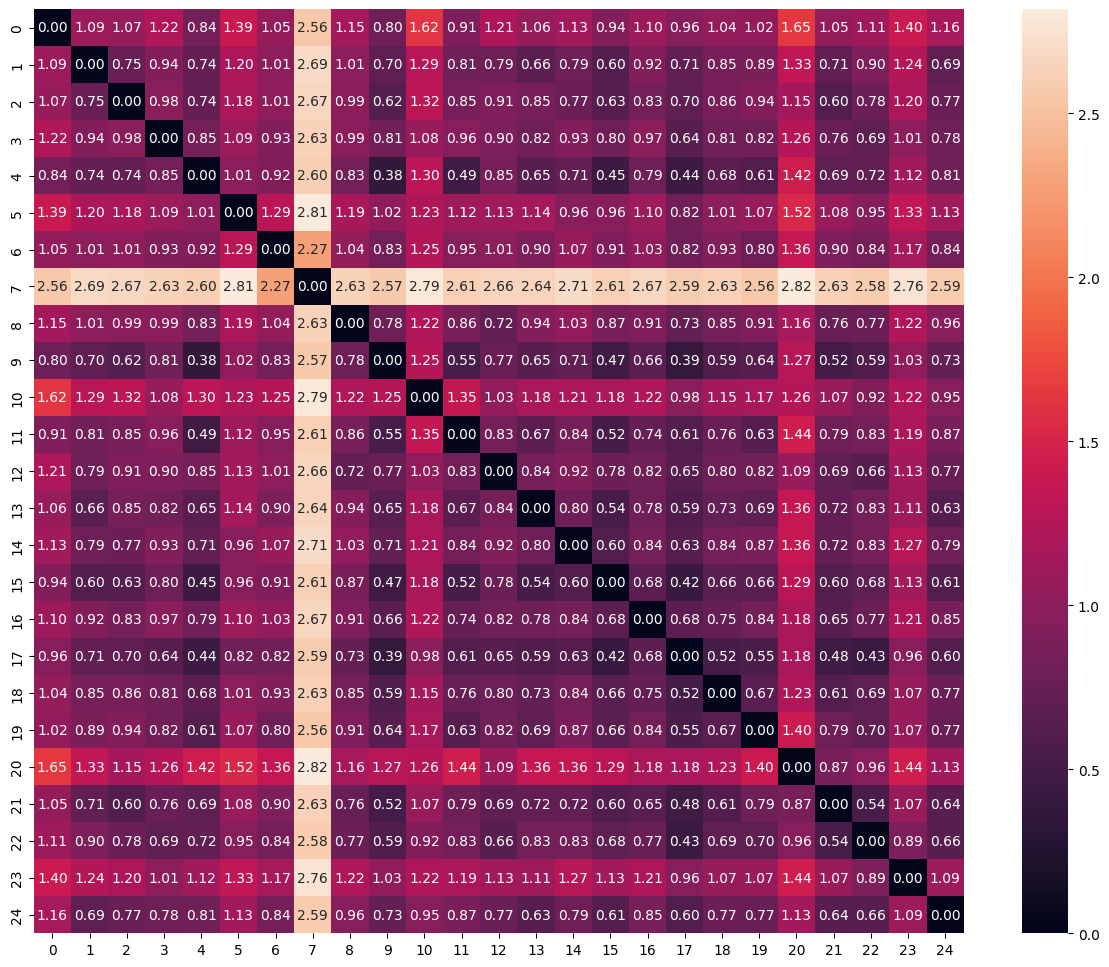

In [41]:
plt.subplots(figsize=(15,12))
sns.heatmap(dist_matrix, annot=True, fmt='.2f')

In [43]:
df[['_id', 'label']].to_csv('25.csv', index=False)

# 12 кластеров

In [44]:
%%time
num_class = 12
cur_model = KMeans(n_clusters=num_class, random_state=42).fit(pd.DataFrame(df['vector'].tolist()))

CPU times: total: 5min 16s
Wall time: 27.9 s


In [45]:
df['label'] = cur_model.labels_

In [46]:
for i in range(num_class):
    print ('%\nClaster_'+str(i)+f": {np.unique(cur_model.labels_, return_counts=True)[1][i]}")
    print(wv.similar_by_vector(cur_model.cluster_centers_[i], topn=10))
    for t in range(3):
        print(df[df['label'] == i]['text'].iloc[t])

%
Claster_0: 48989
[('iot', 0.8206873536109924), ('JeremyShockey_@', 0.7319536209106445), ('@_donlemoncnn_@', 0.704431414604187), ('hollyrpeete_@', 0.6942648887634277), ('dpa_fp', 0.6942231059074402), ('dpa_ry', 0.6921849846839905), ('dpa_cp', 0.6881505846977234), ('dpa_si', 0.6877887845039368), ('zac_efron', 0.6866549849510193), ('samantharonson_@', 0.6862229704856873)]
The Study on Internal Flow Characteristics of Magnetic Drive Pump. 
Improvement of the Prediction-Based Energy Efficient Ethernet Strategy. 
On Fault-Tolerant Control Systems: A Novel Reconfigurable and Adaptive Solution for Industrial Machines. 
%
Claster_1: 8467
[('inferential_statistics', 0.7241565585136414), ('Horses_previewed', 0.7050157189369202), ('impedance_measurements', 0.6927921175956726), ('mso_font_pitch', 0.6889780163764954), ('Descriptive_statistics', 0.6812208294868469), ('eigenvalues', 0.6795954704284668), ('fast_Fourier_transform', 0.6788074970245361), ('Gaussian_distribution', 0.6784235835075378), ('

[('algorithm', 0.8111080527305603), ('algorithms', 0.7505314946174622), ('simulated_annealing', 0.7316677570343018), ('fast_Fourier_transform', 0.7308883666992188), ('computational_algorithms', 0.7221982479095459), ('nondeterministic', 0.7212263345718384), ('deterministically', 0.7184264063835144), ('Bayesian_inference', 0.7179518342018127), ('inferential_statistics', 0.7155304551124573), ('computationally_efficient', 0.7122905850410461)]
PMT: Opposition-Based Learning Technique for Enhancing Meta-Heuristic Performance. Meta-heuristic algorithms have shown promising performance in solving sophisticated real-world optimization problems. Nevertheless, many meta-heuristic algorithms are still suffering from a low convergence rate because of the poor balance between exploration (i.e., roaming new potential search areas) and exploitation (i.e., exploiting the existing neighbors). In some complex problems, the convergence rate can still be poor owing to becoming trapped in local optima. Addr

[('By_Jonas_Elmerraji', 0.7225088477134705), ('By_Laurelle_Gilbert', 0.7209329605102539), ('%_#F########_9v.jsn', 0.705138623714447), ('%_#F########_3v.jsn', 0.7007171511650085), ('Visit_www.gelending.com_clnews', 0.696983277797699), ('BY_JEFF_KARN', 0.6929243206977844), ('Robo_signers_Mortgage', 0.6893128752708435), ('BY_CHERYL_LAVIN_cheryllavin@aol.com', 0.688281774520874), ('By_Elise_Viebeck', 0.6882104277610779), ('By_Miriam_Reimer', 0.6860339045524597)]
CNN-Based Health Model for Regular Health Factors Analysis in Internet-of-Medical Things Environment. Remote health monitoring applications with the advent of Internet of Things (IoT) technologies have changed traditional healthcare services. Additionally, in terms of personalized healthcare and disease prevention services, these depend primarily on the strategy used to derive knowledge from the analysis of lifestyle factors and activities. Through the use of intelligent data retrieval and classification models, it is possible to s

[('method', 0.6526501178741455), ('system', 0.6491220593452454), ('EGPS', 0.6429972648620605), ('stochastic_simulation', 0.6349622011184692), ('YMax_magicJack', 0.6337549090385437), ('called_U2B_R', 0.6320200562477112), ('impedance_measurements', 0.6260855197906494), ('inferential_statistics', 0.6248390078544617), ('parameterisation', 0.6182647347450256), ('Detecting_Conficker_infection', 0.6162822842597961)]
SoK of Used Cryptography in Blockchain. The underlying fundaments of blockchain are cryptography and cryptographic concepts that provide reliable and secure decentralized solutions. Although many recent papers study the use-cases of blockchain in different industrial areas, such as finance, health care, legal relations, IoT, information security, and consensus building systems, only few studies scrutinize the cryptographic concepts used in blockchain. To the best of our knowledge, there is no Systematization of Knowledge (SoK) that gives a complete picture of the existing cryptogr

[('DNA_methylation_patterns', 0.7695291638374329), ('phenotypic_expression', 0.7571082711219788), ('lung_epithelium', 0.7535109519958496), ('autoregulation', 0.7392333745956421), ('plexiform', 0.7379157543182373), ('chromosomal_mutations', 0.7369968295097351), ('molecular_abnormalities', 0.7344119548797607), ('visuomotor', 0.7326014637947083), ('cyclic_AMP_cAMP', 0.732581377029419), ('transgene_expression', 0.7291722297668457)]
Progressive Improved Convolutional Neural Network for Avionics Fault Diagnosis. Among deep learning methods, convolutional neural networks (CNNs) are able to extract features automatically and have increasingly been used in intelligent fault diagnosis studies. However, studies seldomly concentrate on the weakness associated with a highly imbalanced distribution of fault types due to different failure rates and when multiple faults are easily confused with single faults. To solve these problems, this paper developed a stochastic discrete-time series deep convolut

In [47]:
arr=np.array(cur_model.cluster_centers_)
dist_matrix = np.zeros((num_class, num_class))
for i in range(num_class):
    for j in range(num_class):
        dist_matrix[i,j] = np.linalg.norm(arr[i]-arr[j])

<AxesSubplot: >

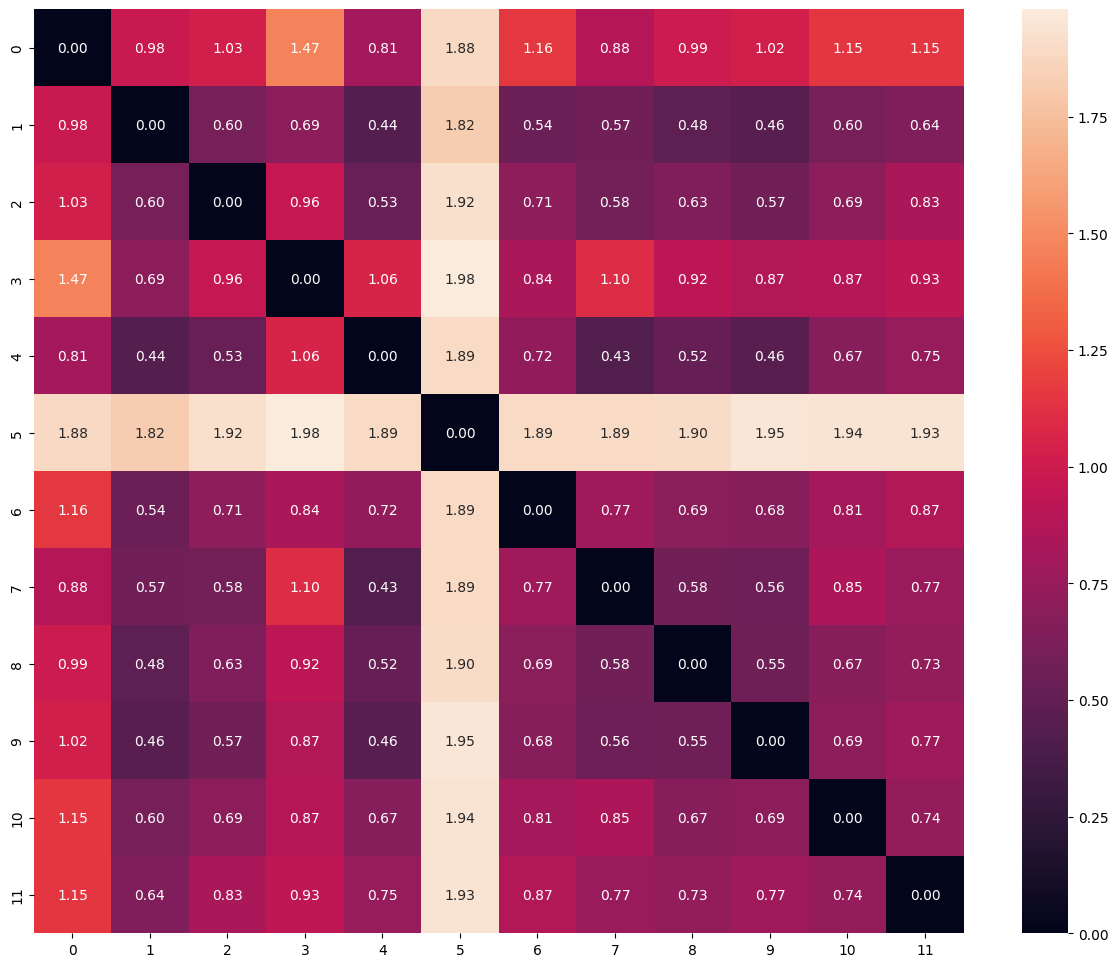

In [48]:
plt.subplots(figsize=(15,12))
sns.heatmap(dist_matrix, annot=True, fmt='.2f')

In [49]:
df[['_id', 'label']].to_csv('12.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

import unidecode
import re


import gensim.downloader as api
from collections import Counter

import spacy

from nltk.corpus import stopwords


from sklearn.cluster import KMeans


def vectorize(tokens, model):
    vectors = []
    for token, cnt in Counter(tokens).items():
        if token in model and len(token)>2 and cnt >2:
            try:
                vectors.append(model[token])
            except KeyError:
                continue
    if vectors:
        vectors = np.asarray(vectors)
        avg_vec = vectors.mean(axis=0)
        return avg_vec.tolist()
    else:
        return np.zeros(model.vector_size)

def project_data_preparation(text, wv = None):
    #if wv is None:
        #wv = api.load('word2vec-google-news-300')
    data = text
    reg = re.compile('[^a-zA-Z ]')
    data= ' '.join(reg.sub(' ', unidecode.unidecode(str(data))).lower().strip().split())
    my_stop = stopwords.words('english')+['article', 'page', 'papper', 'abstract'
                                      , 't', 's', 'by', 'awarded', 'conference', 'will', 'of', 'for', 'problem']
    
    data = [w.lemma_ for w in sp(data) if (w.text not in my_stop)]
    return vectorize(data, wv)